In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from copy import deepcopy


In [4]:
df = pd.read_pickle('DATA_FREQ_VDJ_CDR3_98')
df

,SUBJECTn,CLIN,SEX,V1,V2,V3,V4,V5,V6,V7,...,CDR3_AA_GRAVY.quter,CDR3_AA_GRAVY.tail,CDR3_AA_LENGTH.mean,CDR3_AA_LENGTH.str,CDR3_AA_LENGTH.quter,CDR3_AA_LENGTH.tail,CDR3_AA_POLARITY.mean,CDR3_AA_POLARITY.str,CDR3_AA_POLARITY.quter,CDR3_AA_POLARITY.tail
0,BC_10,Healthy,NaN,0.220240,0.023630,0.459240,0.232679,0.055238,0.008488,0.000484,...,-1.0,-0.17333333333333306,15.566583363084613,3.8140400573600988,13.0,18.0,8.413516101784207,0.5214524393531481,8.04705882352941,8.75454545454545
1,BC_11,Healthy,NaN,0.209268,0.026029,0.476099,0.235566,0.044202,0.008683,0.000154,...,-0.995833333333333,-0.123076923076923,15.436090515166105,3.6172652136720735,13.0,18.0,8.482599018559231,0.49800555512505285,8.13529411764706,8.805882352941179
2,BC_12,Healthy,NaN,0.205156,0.024936,0.415683,0.298063,0.031972,0.010342,0.013848,...,-0.986666666666667,-0.1459935897435895,16.115639999005246,4.112519249025375,13.0,19.0,8.439949841021718,0.4908470198259828,8.1,8.75333333333333
3,BC_13,Healthy,NaN,0.201297,0.046151,0.420261,0.275598,0.049830,0.006616,0.000247,...,-1.0,-0.12222222222222195,15.440365905091548,3.732484244150953,13.0,18.0,8.470984259102124,0.5001470227375485,8.125,8.79375
4,BC_14,Healthy,NaN,0.246696,0.021840,0.452630,0.223807,0.046810,0.007985,0.000231,...,-0.963157894736842,-0.123076923076923,15.976363377474014,3.9563694966376097,13.0,19.0,8.441183495909993,0.4968433667652791,8.091205533596842,8.76
5,BC_16,Healthy,NaN,0.103290,0.020313,0.549408,0.282353,0.036986,0.007552,0.000097,...,-1.00625,-0.14285714285714302,14.839593947964897,3.542838357640536,12.0,17.0,8.50708507474885,0.4958853883620336,8.1625,8.82666666666667
6,BC_17,Healthy,NaN,0.252863,0.032668,0.410501,0.251604,0.042908,0.009313,0.000143,...,-0.95,-0.07777777777777775,15.371349129019226,3.7276682635100253,13.0,18.0,8.44106404788268,0.5097635389023639,8.08333333333333,8.77692307692308
7,BC_18,Healthy,NaN,0.291004,0.026024,0.432402,0.189291,0.050295,0.010807,0.000177,...,-0.9733333333333328,-0.1,15.99518917959739,4.052610623784608,13.0,19.0,8.459089367385076,0.5021852012488323,8.109523809523811,8.78
8,Biotech_045,Healthy,M,0.216058,0.045374,0.471921,0.220418,0.024573,0.008250,0.013406,...,-0.9684210526315792,-0.111111111111111,15.62550153410432,3.863377497777584,13.0,18.0,8.450566100278452,0.5004528071495684,8.1,8.775
9,Biotech_050,Healthy,M,0.129165,0.022596,0.502808,0.284542,0.043602,0.009798,0.007489,...,-0.9888888888888892,-0.166666666666667,15.658552868073743,3.790222083097172,13.0,18.0,8.439791737039567,0.49958934119165344,8.08823529411765,8.76153846153846


In [5]:
# Change categorical data to number 0-2
df["CLIN"] = pd.Categorical(df["CLIN"])
df["CLIN"] = df["CLIN"].cat.codes
# Change dataframe to numpy matrix
data = df.values[:, 3:]
category = df.values[:, 1]

In [15]:
data2 = data.astype(float)
data2
data = data2

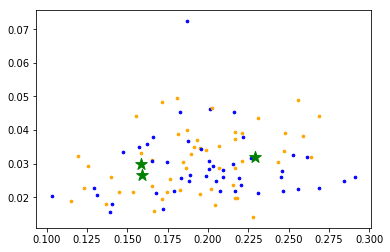

In [16]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

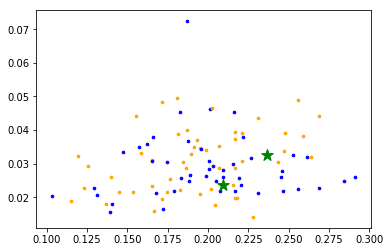

In [20]:
# Number of clusters
k = 2
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

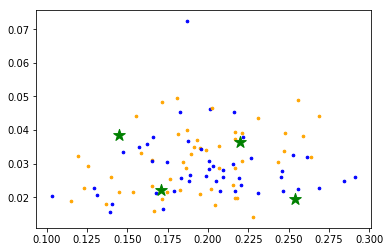

In [22]:
# Number of clusters
k = 4
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [19]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new 

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


KeyboardInterrupt: 

In [ ]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)